<a href="https://colab.research.google.com/github/sarmishtahari/DS/blob/master/09_07_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Handwritten digit recognition


## Data Collection


### Importing the required packages

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load the MNIST dataset

In [2]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
## load_data -- return value is two tuples train,test
(train_digits,train_labels),(test_digits,test_labels) = load_data()
print(train_digits.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


There are 60000 images in the training data. Each image size is 28*28



In [4]:
print(test_digits.shape)

(10000, 28, 28)


There are 10 classes. from class 0 to class 9

In [5]:
print(train_labels.shape)

(60000,)


Class wise images count

In [6]:
type(train_labels)

numpy.ndarray

In [7]:
import pandas as pd
pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

Image count for each label in test data

In [8]:
pd.Series(test_labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

## EDA

### Display a few images with labels.

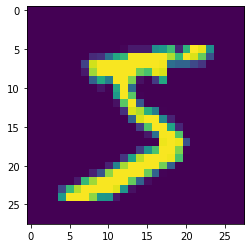

In [9]:
plt.imshow(train_digits[0])

Text(0.5, 1.0, 'Digit 5')

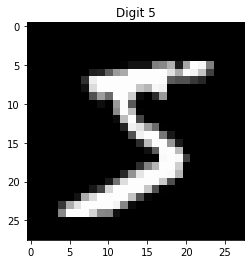

In [10]:
plt.imshow(train_digits[0],cmap='gray')
plt.title("Digit "+ str(train_labels[0]))

In [11]:
train_digits[0][5:10,22:25]

array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [12]:
28*28

784

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

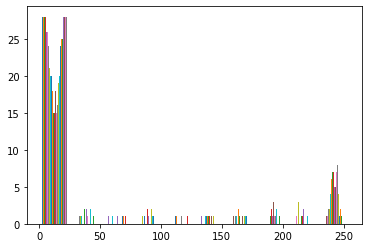

In [14]:
plt.hist(train_digits[0])


(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

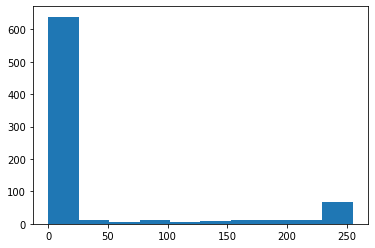

In [15]:
plt.hist(train_digits[0].flat)

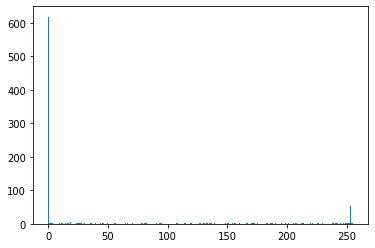

In [16]:
plt.hist(train_digits[0].flat,bins=255)
plt.show()

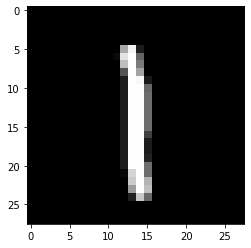

In [17]:
plt.imshow(train_digits[14],cmap='gray')

(array([713.,  17.,   1.,   2.,  10.,   0.,   4.,   4.,   2.,  31.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

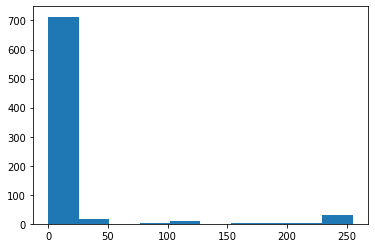

In [18]:
## Pixel distribution for digit 1
plt.hist(train_digits[14].flat)

In [19]:
train_labels[10:20]

array([3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=uint8)

In [20]:
samples = np.random.randint(train_digits.shape[0],size=16)
samples

array([46602, 20079, 27815, 51373, 52978,  1140,  8196, 14862,  7272,
        3528, 51246,  9246,  3859, 25919,  8146, 38575])

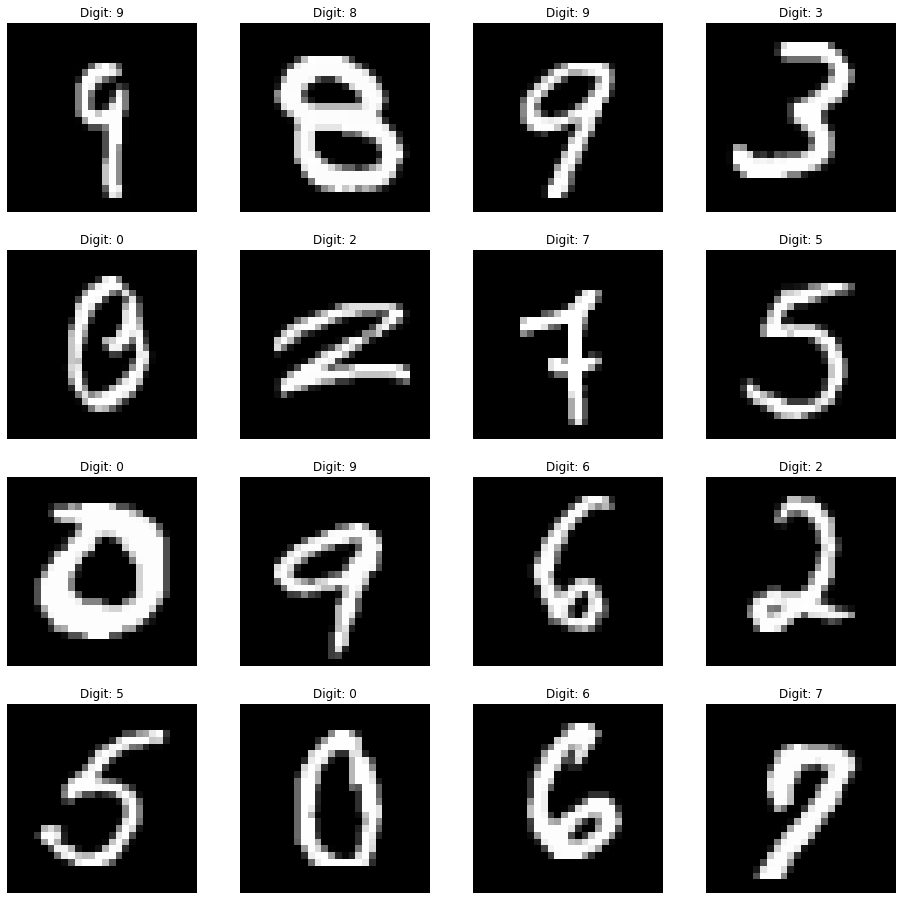

In [21]:
plt.figure(figsize=(16,16))
j = 1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i],cmap='gray')
  plt.title("Digit: "+str(train_labels[i]))
  plt.axis('off')
  j += 1

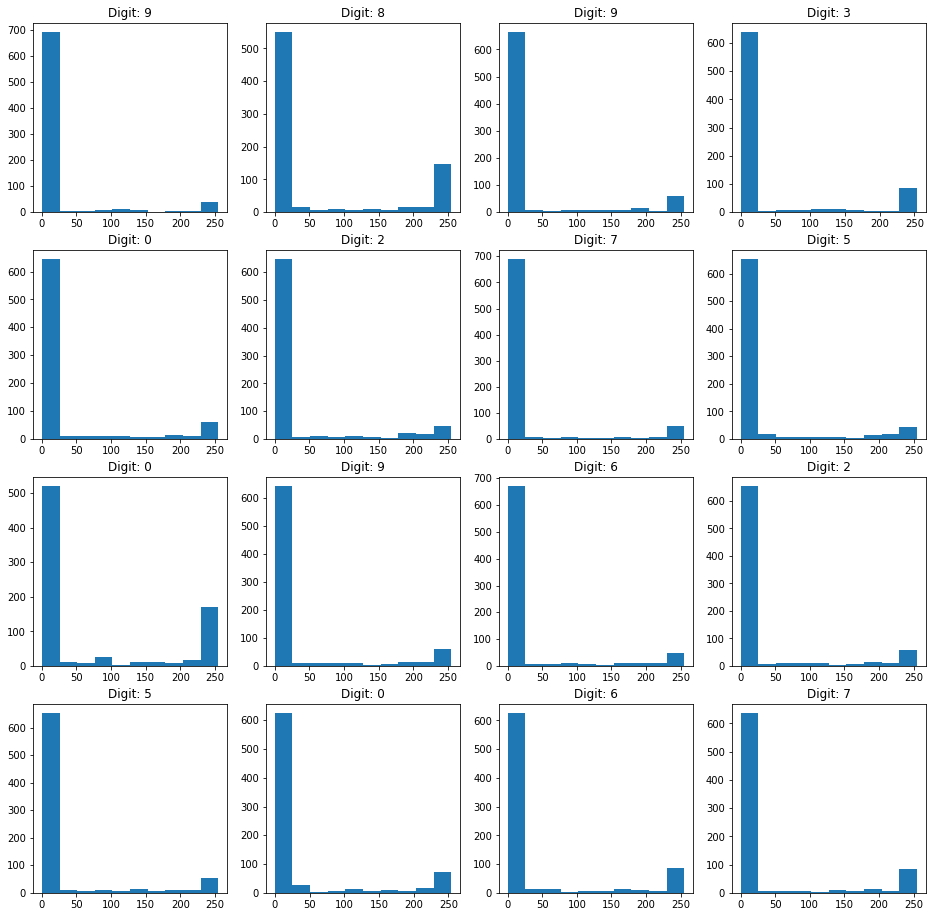

In [22]:
plt.figure(figsize=(16,16))
j = 1
for i in samples:
  plt.subplot(4,4,j)
  plt.hist(train_digits[i].flat)
  plt.title("Digit: "+str(train_labels[i]))
  #plt.axis('off')
  j += 1

## Preprocessing

### Scaling

In [23]:
## pixel values are from 0 to 255
train_digits_sc =  train_digits/255.0
test_digits_sc = test_digits/255.0

### Convert labels into categorical values

In [24]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [25]:
from keras.utils import to_categorical

In [26]:
train_labels_cat = to_categorical(train_labels)

In [27]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [28]:
test_labels_cat = to_categorical(test_labels)
test_labels_cat[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Split the train data to train and validation

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)


## Build and Train the model

### Build the model

* We need to take 1d array as input for Dense layer.
* How many Hidden layers you want to add here?
* How many neurons in each hidden layer?
* What is activation function for the hidden layers?
* How many neurons we should take in the ouput layer?
* What is the activation function for the output layer?

In [30]:
## import the methods required
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [31]:
784*128+ 128

100480

In [32]:
## We are creating the base model
model = Sequential()
# first layer we need to mention the input shape
model.add(Flatten(input_shape=(28,28))) 
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu')) # 784*128+ 128
model.add(Dense(128,activation='relu')) #128*128 +128
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
# Final layer there are 10 classes so use 10 neurons
model.add(Dense(10,activation='softmax'))  # relu --> x or 0 for multiple node you will get 1
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

## Compile the model

* What is the loss function?
* what is the optimizer?
* What are the metrics?

In [33]:
model.compile(optimizer= 'adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

## Training the model

In [34]:
history = model.fit(x=X_train,y=y_train,epochs=10,\
                    validation_data=(X_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 128us/step - loss: 0.2485 - accuracy: 0.9243 - val_loss: 0.1690 - val_accuracy: 0.9488
Epoch 2/10
54000/54000 [==============================] - 7s 121us/step - loss: 0.1083 - accuracy: 0.9673 - val_loss: 0.1206 - val_accuracy: 0.9640
Epoch 3/10
54000/54000 [==============================] - 7s 121us/step - loss: 0.0795 - accuracy: 0.9759 - val_loss: 0.1102 - val_accuracy: 0.9682
Epoch 4/10
54000/54000 [==============================] - 6s 119us/step - loss: 0.0631 - accuracy: 0.9802 - val_loss: 0.1024 - val_accuracy: 0.9725
Epoch 5/10
54000/54000 [==============================] - 6s 117us/step - loss: 0.0495 - accuracy: 0.9837 - val_loss: 0.1022 - val_accuracy: 0.9733
Epoch 6/10
54000/54000 [==============================] - 6s 119us/step - loss: 0.0426 - accuracy: 0.9864 - val_loss: 0.1092 - val_accuracy: 0.9732
Epoch 7/10
54000/54000 [==============================] - 6s 11

## Evaluating the model

In [35]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 32us/step


[0.1281123208291203, 0.9672999978065491]

In [36]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [37]:
test_labels[0]

7

In [38]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.2826988e-15, 8.2593397e-07, 1.6522017e-09, 9.8445540e-08,
        6.0182048e-10, 9.9977327e-12, 9.0326489e-19, 9.9999237e-01,
        1.0410570e-09, 6.6241437e-06]], dtype=float32)

In [39]:
model.predict(test_digits_sc[:10])

array([[1.2827037e-15, 8.2593789e-07, 1.6522144e-09, 9.8445916e-08,
        6.0182392e-10, 9.9977708e-12, 9.0326830e-19, 9.9999237e-01,
        1.0410611e-09, 6.6241632e-06],
       [1.6338470e-13, 1.6922256e-12, 1.0000000e+00, 6.3007420e-12,
        6.5677529e-15, 1.5618351e-16, 3.0036490e-13, 3.9483057e-09,
        8.2118638e-14, 3.9067066e-21],
       [4.8167212e-12, 9.9999404e-01, 5.6196761e-08, 3.6427590e-08,
        2.0295611e-06, 4.1357597e-09, 1.9358126e-09, 1.9987438e-06,
        1.8116446e-06, 3.1579312e-08],
       [1.0000000e+00, 1.1530537e-12, 2.8460677e-08, 1.4782041e-10,
        3.4332238e-11, 1.5067755e-10, 1.5049933e-08, 4.4250097e-11,
        2.9070002e-11, 1.8139070e-09],
       [9.8545356e-12, 4.7436689e-08, 6.0968610e-08, 6.7511918e-10,
        9.9997973e-01, 1.0051666e-06, 1.0996083e-08, 1.1466352e-08,
        1.4580877e-07, 1.8906776e-05],
       [7.1524614e-15, 9.9999964e-01, 2.9175212e-10, 7.1973388e-10,
        1.2018495e-07, 6.9581394e-12, 5.1845550e-13, 1.19

In [40]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [41]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.2826988e-15, 8.2593397e-07, 1.6522017e-09, 9.8445540e-08,
        6.0182048e-10, 9.9977327e-12, 9.0326489e-19, 9.9999237e-01,
        1.0410570e-09, 6.6241437e-06]], dtype=float32)

In [42]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [43]:
history.history

{'accuracy': [0.9242963,
  0.96731484,
  0.97585183,
  0.9802222,
  0.98370373,
  0.9864074,
  0.98877776,
  0.98944443,
  0.99087036,
  0.9916111],
 'loss': [0.24852030802794076,
  0.10828753999965611,
  0.07954721572219084,
  0.06305763351270514,
  0.04949478148297338,
  0.042591398688710154,
  0.03613514878166865,
  0.03282440812539965,
  0.02894785328466484,
  0.02607869211887333],
 'val_accuracy': [0.9488333463668823,
  0.9639999866485596,
  0.9681666493415833,
  0.9725000262260437,
  0.9733333587646484,
  0.9731666445732117,
  0.9764999747276306,
  0.9760000109672546,
  0.9706666469573975,
  0.9671666622161865],
 'val_loss': [0.1690103596150875,
  0.12055320687467853,
  0.11021615553150574,
  0.10239121996735533,
  0.10224051941706178,
  0.10921523167286068,
  0.11252308045870935,
  0.10594695235509426,
  0.13495585443475283,
  0.148211945896619]}

In [44]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

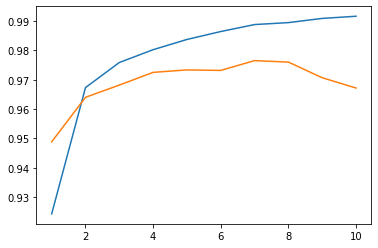

In [45]:
plt.plot(range(1,11),history.history['accuracy'])
plt.plot(range(1,11),history.history['val_accuracy'])